<a href="https://colab.research.google.com/github/GODHYEONJU/MS-AI-School-/blob/main/DL/5_9_Keras_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

**mnist 데이터베이스**
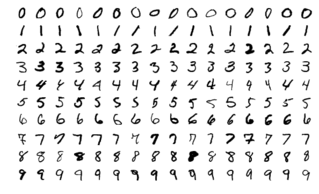

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

60000건으로 학습하고 10000건으로 테스트할 예정

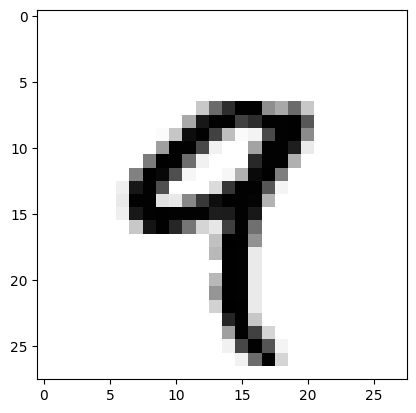

In [ ]:
# 데이터의 확인
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

#이미지 데이터셋에서 5번째 이미지를 train_images라는 변수로 불러와서 digit이라는 변수에 할당
# print(digit)

#imshow 함수는 이미지를 보여주는 함수
#cmap은 colormap을 설정하는 인자
#plt.cm.binary는 흑백 이미지를 표시하기 위한 colormap
#따라서 plt.imshow(digit, cmap=plt.cm.binary)는 digit 변수에 저장된 이미지 데이터를 흑백으로 시각화하는 코드

In [ ]:
#신경망을 만드는 부분
from keras.engine.training import optimizer
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))#layer1 유닛 개수 512, 입력되는 모양 28*28
network.add(layers.Dense(10,activation='softmax')) #layer2 = 출력층 0~9까지 layer계산, 모양은 위와 동일하게 적용됨.
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#데이터를 준비하는 부분

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

**이미지 데이터는 3차원 -> 2차원으로 차원축소를 해주면 부화가 안걸리고 쉽게 해결할 수 있음.
reshape : 데이터 모양만 바뀔 뿐 데이터 내용은 유지
**




In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#데이터는 숫자가 아닌 문자 데이터로 인식 설정(계산 x)

#라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels) #4차원으로 인코딩되어 버림

In [ ]:
#신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2682 - accuracy: 0.9220
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0705 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0386 - accuracy: 0.9882


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9809
test acc: 0.98089998960495


In [ ]:
# IMDB(internet movie data base)

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
#빈도가 높은 순으로 10000가지

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

**1(긍정T), 0(부정F)으로만 이루어진 라벨**

In [ ]:
#Train data안에 데이터 개수 알아보기
# i = 0
# for sequence in train_data:
# #   i=i+1
# # print(i)

# for sequence in train_data:
#   print(max(sequence))

max([max(sequence) for sequence in train_data])

9999

In [ ]:
# 데이터 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [ ]:

a = [1,2,3,4]
for i, item in enumerate(a):
  print(i, item)

0 1
1 2
2 3
3 4


In [ ]:
# 함수 호출
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 라벨 데이터도 실수형으로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
# 신경망 제작
from keras import models
from keras import layers

model = models.Sequential()
#input layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

#hidden layer
model.add(layers.Dense(16, activation='relu'))
#output layer
model.add(layers.Dense(1, activation='sigmoid')) #최종 출력은 1또는 0만 있으면 되니깐 1개만 있으면됨.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1414 - accuracy: 0.9546 - val_loss: 0.2915 - val_accuracy: 0.8870
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1218 - accuracy: 0.9612 - val_loss: 0.2949 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1065 - accuracy: 0.9660 - val_loss: 0.3303 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0921 - accuracy: 0.9732 - val_loss: 0.3189 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0782 - accuracy: 0.9794 - val_loss: 0.3344 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0690 - accuracy: 0.9807 - val_loss: 0.3548 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0562 - accuracy: 0.9861 - val_loss: 0.3886 - val_accuracy: 0.8803
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

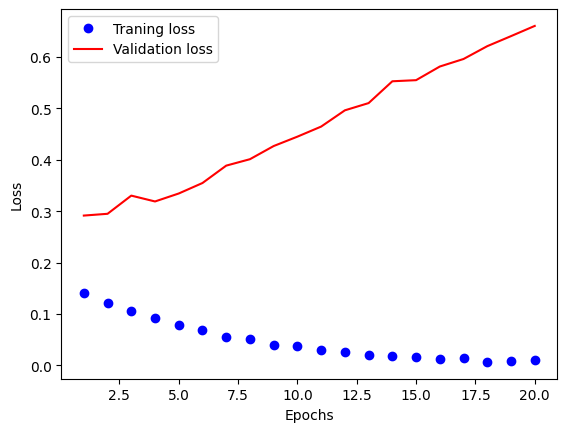

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

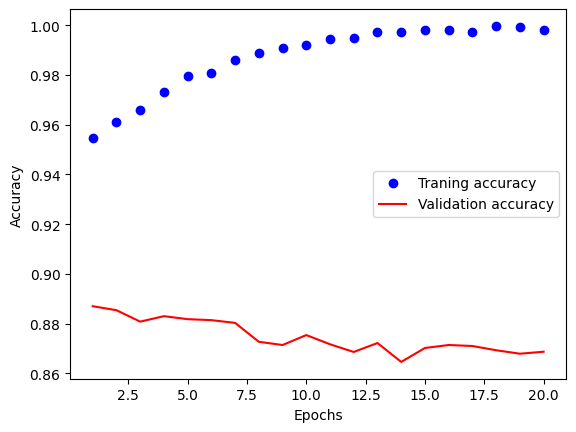

In [ ]:
# 정확도에 대한 맵플롯
plt.plot(epochs, acc, 'bo', label='Traning accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.15352343],
       [0.9989329 ],
       [0.8292947 ],
       ...,
       [0.0600851 ],
       [0.11067616],
       [0.6403887 ]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 1.7301 - accuracy: 0.4990
loss=1.7300664186477661, accuracy=0.4989599883556366
